Link to the DataSet : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
#from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [29]:
data = pd.read_csv("C:/Users/admin/Downloads/creditcard.csv")
data = pd.DataFrame(data)

In [3]:
fraud     = data[data["Class"]==1]
not_fraud = data[data["Class"]==0].iloc[:10000,:]
data = pd.concat([not_fraud,fraud],axis = 0)
data.shape

(50492, 31)

In [30]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


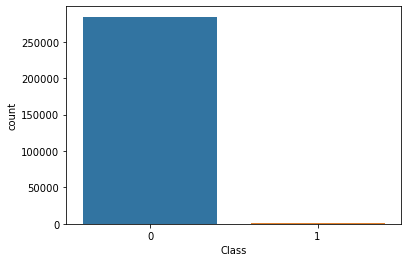

In [32]:
sns.countplot(data["Class"])

In [33]:
# Dropping Time Feature

data.drop("Time",axis = 1,inplace = True)

In [34]:
# Applying StandaredScaler to Amount Feature

sc = StandardScaler()
data["Amount"] = sc.fit_transform(np.array(data["Amount"]).reshape(-1,1))

In [35]:
# Creating Empty Dataframe 

result = pd.DataFrame({"Algorithms":["LogisticReg","LogisticReg","LogisticReg","LogisticReg","DecisionTreeClf","DecisionTreeClf","DecisionTreeClf","DecisionTreeClf"],
                       "Techniques":["imbalanced","oversample","undersample","smote","imbalanced","oversample","undersample","smote"],
                       "Accuracy"  : [0,0,0,0,0,0,0,0], "Precision" : [0,0,0,0,0,0,0,0] ,"Recall" : [0,0,0,0,0,0,0,0],
                       "F1-Score"  : [0,0,0,0,0,0,0,0]
                       
                      })

In [36]:
result

,Algorithms,Techniques,Accuracy,Precision,Recall,F1-Score
0,LogisticReg,imbalanced,0,0,0,0
1,LogisticReg,oversample,0,0,0,0
2,LogisticReg,undersample,0,0,0,0
3,LogisticReg,smote,0,0,0,0
4,DecisionTreeClf,imbalanced,0,0,0,0
5,DecisionTreeClf,oversample,0,0,0,0
6,DecisionTreeClf,undersample,0,0,0,0
7,DecisionTreeClf,smote,0,0,0,0


## 1. Unbalanced or Imbalanced : Means that one of the  class value of a target column out number's the other value by a large Proportion.

              eg : 100000 Non Fraudulent Transaction and 400 Fraud Fraudulent Transactions 
            

## 2. oversampling : Means Replicating the Minority class sample's. 
    eg : in our case minority class 400 Fraud Fraudulent Transactions were replicated to make it to equal count as Majority class i.e 100000 Non Fraudulent Transaction .

## 3 . undersampling : Means downsampling or deleting the rows of Majority Class Sample's .
    
    eg : in our case Majority class 100000 Non Fraudulent Transaction were down sampled to equal count as Minority class sample 
         i.e 400 Fraud Fraudulent Transactions .

## 4 . smote : (Synthetic Oversampling Technique ) again its's one of the oversampling technique's .
            which works on the concept of KNN algo.

In [37]:
lrcnt   = 0
dectree = 4
#cnt = 0

In [38]:
for i in range(4):
    x = data.drop("Class",axis = 1).copy()
    y = data["Class"].copy()
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state  = 33)
    
    if(i==0):
        pass
    
    
    elif((i==1) or (i==2)):
        
         #  trainig instances only we apply any of the sampling techniques
        
        temp_df = pd.concat([xtrain,ytrain],axis = 1)
        fraud     = temp_df[temp_df["Class"]==1]
        not_fraud = temp_df[temp_df["Class"]==0]
            
        if(i == 1):
                              # Let's do oversampling of minority class i.e 1 in our case
                
            over_sampled = fraud.sample(n = len(not_fraud),replace  = True)
            data1 = over_sampled
            data2 = not_fraud
              
        else:
        # Let's do undersampling of Majority class i.e 0 in our case
          
            under_sample = not_fraud.sample(n = len(fraud),replace = True)
            data1 = under_sample
            data2 = fraud
                    
                    
        dnew = pd.concat([data1,data2],axis = 0)
        xtrain = dnew.drop("Class",axis = 1)
        ytrain = dnew["Class"]
        
                    
                    
    else:
        # Applying SMOTE Algorithm (Synthetic Minority Oversampling Technique's . )
        sm = SMOTE(sampling_strategy = 1.0,random_state = 33,n_jobs = -1)
        xtrain,ytrain = sm.fit_sample(xtrain,ytrain)
    
    
    
    for j in range(2):
        if(j==0):
            clf = LogisticRegression()
            cnt = lrcnt
            lrcnt=lrcnt+1
            
            
        else:
            clf = DecisionTreeClassifier()
            cnt = dectree
            dectree=dectree+1
            
        clf.fit(xtrain,ytrain)
        ypred = clf.predict(xtest)
            
        result.iloc[cnt,2] = round(100*accuracy_score(ytest,ypred),2)
        result.iloc[cnt,3] = round(100*precision_score(ytest,ypred),2)
        result.iloc[cnt,4] = round(100*recall_score(ytest,ypred),2)
        result.iloc[cnt,5] = round(100*f1_score(ytest,ypred),2)
        
            
            
            

In [39]:
result

,Algorithms,Techniques,Accuracy,Precision,Recall,F1-Score
0,LogisticReg,imbalanced,99.91,84.55,61.59,71.26
1,LogisticReg,oversample,97.68,6.42,89.40,11.98
2,LogisticReg,undersample,97.37,5.63,88.08,10.59
3,LogisticReg,smote,97.46,5.90,89.40,11.06
4,DecisionTreeClf,imbalanced,99.91,74.67,74.17,74.42
5,DecisionTreeClf,oversample,99.91,81.15,65.56,72.53
6,DecisionTreeClf,undersample,91.24,1.76,88.74,3.46
7,DecisionTreeClf,smote,99.74,37.15,70.86,48.75


In [50]:
import matplotlib.pyplot as plt

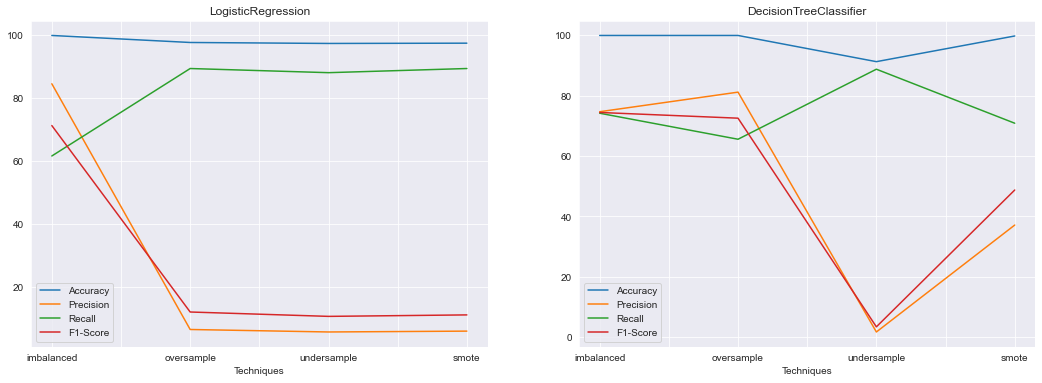

In [53]:
# Let's See Visually

fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (18,6))
res = result[["Techniques","Accuracy","Precision","Recall","F1-Score"]]

res.iloc[:4].plot(x = "Techniques",kind = 'line',ax = axes[0],legend = True,grid = True,title = "LogisticRegression")
res.iloc[4:].plot(x = "Techniques",kind = 'line',ax = axes[1],legend = True,grid = True,title = "DecisionTreeClassifier")